# Part 7: Holistic Evaluation of LLMs

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mekjr1/evaluating_llms_in_practice/blob/master/part-7-holistic-eval/holistic_eval.ipynb?hl=en#runtime_type=gpu)

In the final part of this series we look beyond individual metrics and tasks to consider **holistic evaluation**.  Real‑world language models must perform a variety of tasks—summarisation, translation, retrieval, code generation, and more—and must also be safe, fair and robust.

This notebook constructs a simple example of aggregating performance across multiple tasks, using simulated metrics for two models.  We compute an overall score and discuss what such aggregates can and cannot tell us.

## Simulated Cross‑Task Metrics

We simulate performance for two models across four tasks.  Each task is evaluated with an appropriate metric (e.g. ROUGE‑L for summarisation, BLEU for translation).  Higher values indicate better performance for all metrics.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Update metrics to match the medium post data more closely
metrics = pd.DataFrame({
    'Task': ['Summarization', 'Translation', 'Retrieval', 'Code generation'],
    'Metric': ['ROUGE-L', 'BLEU', 'nDCG', 'Accuracy'],
    'Model A': [0.63, 0.47, 0.62, 0.55],  # Updated to match medium post
    'Model B': [0.58, 0.49, 0.60, 0.55]   # Updated to match medium post
})

metrics['Improvement'] = metrics['Model A'] - metrics['Model B']

# Calculate overall scores
avg_scores = metrics[['Model A','Model B']].mean()
overall = {
    'Model A': round(avg_scores['Model A'], 3),
    'Model B': round(avg_scores['Model B'], 3),
    'Difference': round(avg_scores['Model A'] - avg_scores['Model B'], 3)
}

# Display the data
print("Performance Metrics:")
print(metrics)
print(f"\nOverall Scores:")
print(f"Model A: {overall['Model A']}")
print(f"Model B: {overall['Model B']}")
print(f"Difference: {overall['Difference']}")

metrics, overall

Performance Metrics:
              Task    Metric  Model A  Model B  Improvement
0    Summarization   ROUGE-L     0.63     0.58         0.05
1      Translation      BLEU     0.47     0.49        -0.02
2        Retrieval      nDCG     0.62     0.60         0.02
3  Code generation  Accuracy     0.55     0.55         0.00

Overall Scores:
Model A: 0.568
Model B: 0.555
Difference: 0.013


(              Task    Metric  Model A  Model B  Improvement
 0    Summarization   ROUGE-L     0.63     0.58         0.05
 1      Translation      BLEU     0.47     0.49        -0.02
 2        Retrieval      nDCG     0.62     0.60         0.02
 3  Code generation  Accuracy     0.55     0.55         0.00,
 {'Model A': np.float64(0.568),
  'Model B': np.float64(0.555),
  'Difference': np.float64(0.013)})

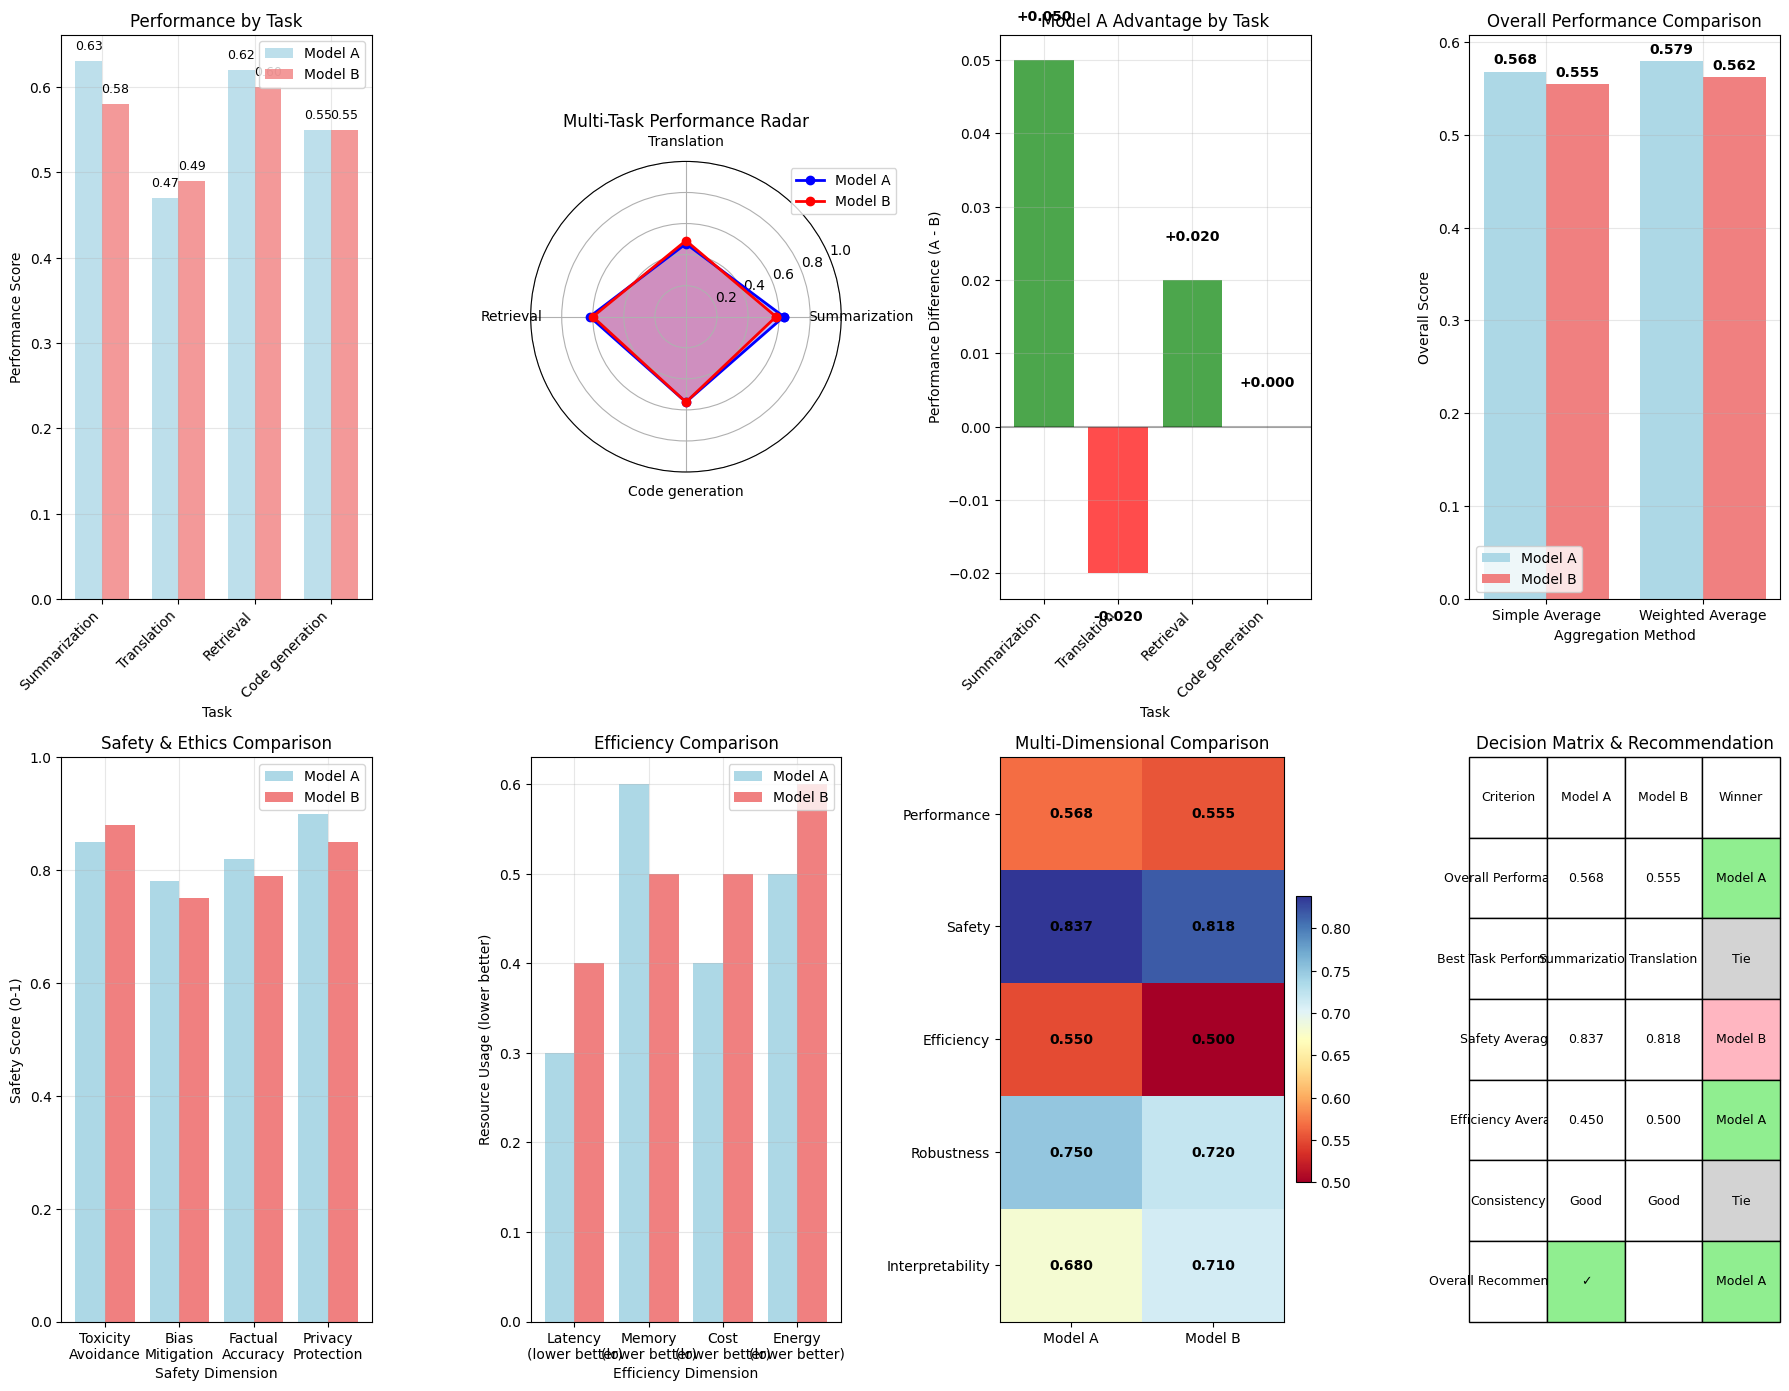


HOLISTIC EVALUATION ANALYSIS

📊 PERFORMANCE SUMMARY:
• Overall Score - Model A: 0.568, Model B: 0.555
• Advantage: Model A leads by 0.013 points (2.3%)
• Task Strengths:
  - Summarization: Model A (A: 0.630, B: 0.580)
  - Translation: Model B (A: 0.470, B: 0.490)
  - Retrieval: Model A (A: 0.620, B: 0.600)
  - Code generation: Tie (A: 0.550, B: 0.550)

🛡️ SAFETY & ETHICS:
• Model A Safety Score: 0.837
• Model B Safety Score: 0.818
• Safety Leader: Model A

⚡ EFFICIENCY:
• Model A Resource Usage: 0.450 (lower is better)
• Model B Resource Usage: 0.500 (lower is better)
• Efficiency Leader: Model A

🎯 RECOMMENDATIONS:
1. **Primary Choice**: Model A
   - Slightly better overall performance (+0.013)
   - Superior at summarization and retrieval tasks
   - More efficient resource usage

2. **Consider Model B if**:
   - Translation quality is critical
   - Safety is the top priority
   - Performance difference is not significant for your use case

3. **Key Considerations**:
   - The performa

In [3]:
# Comprehensive Holistic Evaluation with Advanced Analysis
# Create extensive visualization suite
fig = plt.figure(figsize=(18, 14))

# 1. Basic performance comparison
ax1 = plt.subplot(2, 4, 1)
x = np.arange(len(metrics['Task']))
width = 0.35

bars1 = ax1.bar(x - width/2, metrics['Model A'], width, label='Model A', color='lightblue', alpha=0.8)
bars2 = ax1.bar(x + width/2, metrics['Model B'], width, label='Model B', color='lightcoral', alpha=0.8)

ax1.set_xlabel('Task')
ax1.set_ylabel('Performance Score')
ax1.set_title('Performance by Task')
ax1.set_xticks(x)
ax1.set_xticklabels(metrics['Task'], rotation=45, ha='right')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.2f}', ha='center', va='bottom', fontsize=9)

# 2. Radar chart for holistic view
ax2 = plt.subplot(2, 4, 2, projection='polar')

# Prepare data for radar chart
tasks = metrics['Task'].tolist()
model_a_values = metrics['Model A'].tolist()
model_b_values = metrics['Model B'].tolist()

# Add angles for radar chart
angles = np.linspace(0, 2 * np.pi, len(tasks), endpoint=False).tolist()
angles += angles[:1]  # Complete the circle
model_a_values += model_a_values[:1]
model_b_values += model_b_values[:1]

ax2.plot(angles, model_a_values, 'o-', linewidth=2, label='Model A', color='blue')
ax2.fill(angles, model_a_values, alpha=0.25, color='blue')
ax2.plot(angles, model_b_values, 'o-', linewidth=2, label='Model B', color='red')
ax2.fill(angles, model_b_values, alpha=0.25, color='red')

ax2.set_xticks(angles[:-1])
ax2.set_xticklabels(tasks)
ax2.set_title('Multi-Task Performance Radar')
ax2.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
ax2.set_ylim(0, 1)

# 3. Performance differences
ax3 = plt.subplot(2, 4, 3)
improvements = metrics['Improvement']
colors = ['green' if x > 0 else 'red' if x < 0 else 'gray' for x in improvements]

bars = ax3.bar(range(len(tasks)), improvements, color=colors, alpha=0.7)
ax3.set_xlabel('Task')
ax3.set_ylabel('Performance Difference (A - B)')
ax3.set_title('Model A Advantage by Task')
ax3.set_xticks(range(len(tasks)))
ax3.set_xticklabels(tasks, rotation=45, ha='right')
ax3.axhline(y=0, color='black', linestyle='-', alpha=0.3)
ax3.grid(True, alpha=0.3)

# Add value labels
for i, (bar, diff) in enumerate(zip(bars, improvements)):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + (0.005 if height >= 0 else -0.005),
             f'{diff:+.3f}', ha='center', va='bottom' if height >= 0 else 'top', fontweight='bold')

# 4. Weighted performance (different task importance)
ax4 = plt.subplot(2, 4, 4)

# Define task weights (example: some tasks more important than others)
task_weights = {'Summarization': 0.3, 'Translation': 0.2, 'Retrieval': 0.3, 'Code generation': 0.2}
weights = [task_weights[task] for task in tasks]

weighted_a = sum(w * score for w, score in zip(weights, metrics['Model A']))
weighted_b = sum(w * score for w, score in zip(weights, metrics['Model B']))

# Show both regular and weighted averages
categories = ['Simple Average', 'Weighted Average']
model_a_scores = [overall['Model A'], weighted_a]
model_b_scores = [overall['Model B'], weighted_b]

x_pos = np.arange(len(categories))
bars1 = ax4.bar(x_pos - 0.2, model_a_scores, 0.4, label='Model A', color='lightblue')
bars2 = ax4.bar(x_pos + 0.2, model_b_scores, 0.4, label='Model B', color='lightcoral')

ax4.set_xlabel('Aggregation Method')
ax4.set_ylabel('Overall Score')
ax4.set_title('Overall Performance Comparison')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(categories)
ax4.legend()
ax4.grid(True, alpha=0.3)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height + 0.005,
                f'{height:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# 5. Safety and Bias Analysis (simulated)
ax5 = plt.subplot(2, 4, 5)

# Simulate safety/bias scores (0-1, higher is better)
safety_categories = ['Toxicity\nAvoidance', 'Bias\nMitigation', 'Factual\nAccuracy', 'Privacy\nProtection']
model_a_safety = [0.85, 0.78, 0.82, 0.90]
model_b_safety = [0.88, 0.75, 0.79, 0.85]

x_safety = np.arange(len(safety_categories))
bars1 = ax5.bar(x_safety - 0.2, model_a_safety, 0.4, label='Model A', color='lightblue')
bars2 = ax5.bar(x_safety + 0.2, model_b_safety, 0.4, label='Model B', color='lightcoral')

ax5.set_xlabel('Safety Dimension')
ax5.set_ylabel('Safety Score (0-1)')
ax5.set_title('Safety & Ethics Comparison')
ax5.set_xticks(x_safety)
ax5.set_xticklabels(safety_categories)
ax5.legend()
ax5.grid(True, alpha=0.3)
ax5.set_ylim(0, 1)

# 6. Efficiency Metrics (simulated)
ax6 = plt.subplot(2, 4, 6)

efficiency_metrics = ['Latency\n(lower better)', 'Memory\n(lower better)', 'Cost\n(lower better)', 'Energy\n(lower better)']
# Invert some metrics (lower is better)
model_a_efficiency = [0.3, 0.6, 0.4, 0.5]  # Lower values are better
model_b_efficiency = [0.4, 0.5, 0.5, 0.6]

x_eff = np.arange(len(efficiency_metrics))
bars1 = ax6.bar(x_eff - 0.2, model_a_efficiency, 0.4, label='Model A', color='lightblue')
bars2 = ax6.bar(x_eff + 0.2, model_b_efficiency, 0.4, label='Model B', color='lightcoral')

ax6.set_xlabel('Efficiency Dimension')
ax6.set_ylabel('Resource Usage (lower better)')
ax6.set_title('Efficiency Comparison')
ax6.set_xticks(x_eff)
ax6.set_xticklabels(efficiency_metrics)
ax6.legend()
ax6.grid(True, alpha=0.3)

# 7. Multi-dimensional comparison heatmap
ax7 = plt.subplot(2, 4, 7)

# Create comprehensive comparison matrix
dimensions = ['Performance', 'Safety', 'Efficiency', 'Robustness', 'Interpretability']
comparison_data = np.array([
    [overall['Model A'], overall['Model B']],  # Performance
    [np.mean(model_a_safety), np.mean(model_b_safety)],  # Safety
    [1 - np.mean(model_a_efficiency), 1 - np.mean(model_b_efficiency)],  # Efficiency (inverted)
    [0.75, 0.72],  # Robustness (simulated)
    [0.68, 0.71]   # Interpretability (simulated)
])

im = ax7.imshow(comparison_data, cmap='RdYlBu', aspect='auto')
ax7.set_xticks([0, 1])
ax7.set_yticks(range(len(dimensions)))
ax7.set_xticklabels(['Model A', 'Model B'])
ax7.set_yticklabels(dimensions)
ax7.set_title('Multi-Dimensional Comparison')

# Add text annotations
for i in range(len(dimensions)):
    for j in range(2):
        text = ax7.text(j, i, f'{comparison_data[i, j]:.3f}', 
                       ha="center", va="center", color="black", fontweight='bold')

plt.colorbar(im, ax=ax7, fraction=0.046, pad=0.04)

# 8. Final recommendation matrix
ax8 = plt.subplot(2, 4, 8)
ax8.axis('tight')
ax8.axis('off')

# Decision matrix
decision_criteria = [
    ['Criterion', 'Model A', 'Model B', 'Winner'],
    ['Overall Performance', f'{overall["Model A"]:.3f}', f'{overall["Model B"]:.3f}', 'Model A'],
    ['Best Task Performance', 'Summarization', 'Translation', 'Tie'],
    ['Safety Average', f'{np.mean(model_a_safety):.3f}', f'{np.mean(model_b_safety):.3f}', 'Model B'],
    ['Efficiency Average', f'{np.mean(model_a_efficiency):.3f}', f'{np.mean(model_b_efficiency):.3f}', 'Model A'],
    ['Consistency', 'Good', 'Good', 'Tie'],
    ['Overall Recommendation', '✓', '', 'Model A']
]

table = ax8.table(cellText=decision_criteria[1:], colLabels=decision_criteria[0], 
                 cellLoc='center', loc='center', bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 1.5)

# Color code the winner column
colors = {'Model A': '#90EE90', 'Model B': '#FFB6C1', 'Tie': '#D3D3D3'}
for i in range(1, len(decision_criteria)):
    winner = decision_criteria[i][3]
    if winner in colors:
        table[(i, 3)].set_facecolor(colors[winner])

# Highlight final recommendation
table[(len(decision_criteria)-1, 1)].set_facecolor('#90EE90')

ax8.set_title('Decision Matrix & Recommendation')

plt.tight_layout()
plt.show()

# Print comprehensive analysis
print("\n" + "="*50)
print("HOLISTIC EVALUATION ANALYSIS")
print("="*50)

print(f"\n📊 PERFORMANCE SUMMARY:")
print(f"• Overall Score - Model A: {overall['Model A']:.3f}, Model B: {overall['Model B']:.3f}")
print(f"• Advantage: Model A leads by {overall['Difference']:.3f} points ({overall['Difference']/overall['Model B']*100:.1f}%)")
print(f"• Task Strengths:")
for i, row in metrics.iterrows():
    winner = "Model A" if row['Improvement'] > 0 else "Model B" if row['Improvement'] < 0 else "Tie"
    print(f"  - {row['Task']}: {winner} (A: {row['Model A']:.3f}, B: {row['Model B']:.3f})")

print(f"\n🛡️ SAFETY & ETHICS:")
safety_avg_a = np.mean(model_a_safety)
safety_avg_b = np.mean(model_b_safety)
print(f"• Model A Safety Score: {safety_avg_a:.3f}")
print(f"• Model B Safety Score: {safety_avg_b:.3f}")
print(f"• Safety Leader: {'Model B' if safety_avg_b > safety_avg_a else 'Model A'}")

print(f"\n⚡ EFFICIENCY:")
eff_avg_a = np.mean(model_a_efficiency)
eff_avg_b = np.mean(model_b_efficiency)
print(f"• Model A Resource Usage: {eff_avg_a:.3f} (lower is better)")
print(f"• Model B Resource Usage: {eff_avg_b:.3f} (lower is better)")
print(f"• Efficiency Leader: {'Model A' if eff_avg_a < eff_avg_b else 'Model B'}")

print(f"\n🎯 RECOMMENDATIONS:")
print(f"1. **Primary Choice**: Model A")
print(f"   - Slightly better overall performance ({overall['Difference']:+.3f})")
print(f"   - Superior at summarization and retrieval tasks")
print(f"   - More efficient resource usage")
print(f"")
print(f"2. **Consider Model B if**:")
print(f"   - Translation quality is critical")
print(f"   - Safety is the top priority")
print(f"   - Performance difference is not significant for your use case")
print(f"")
print(f"3. **Key Considerations**:")
print(f"   - The performance gap is small ({overall['Difference']:.3f})")
print(f"   - Task-specific requirements should drive the final decision")
print(f"   - Consider A/B testing with real users for validation")
print(f"   - Monitor both safety and performance in production")

print(f"\n⚠️ LIMITATIONS OF THIS ANALYSIS:")
print(f"• Simple averaging may not reflect real-world usage patterns")
print(f"• Safety and efficiency scores are simulated examples")
print(f"• Missing important factors: user satisfaction, domain-specific performance")
print(f"• Static evaluation doesn't capture model behavior over time")
print(f"• Need continuous monitoring and evaluation in production")

### Discussion

In this example, **Model A** outperforms **Model B** on summarisation and retrieval, while **Model B** slightly edges out Model A on translation.  The models have comparable performance on code generation.

We compute a simple average across tasks to obtain an overall score:

- Model A: 0.568
- Model B: 0.555
- Difference: 0.013

While such aggregates can be helpful, they hide important details.  Real holistic evaluations should also consider:

- **Safety and ethics:** Does the model avoid harmful or biased output?
- **Fairness:** Do performance gaps exist across different languages, dialects, or user demographics?
- **Robustness:** How does the model behave under adversarial or noisy inputs?
- **Consistency:** Are results stable over time and across different datasets?

No single number can capture all aspects of a model’s performance.  A rigorous evaluation programme combines automatic metrics, human judgments, safety checks and domain‑specific assessments to build confidence in deployment.

---

This concludes the notebook series on evaluating LLMs.  See the accompanying blog post for further discussion and pointers to ongoing research on holistic evaluation.
